In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, make_scorer, accuracy_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [6]:
data = pd.read_csv('148141-imbalanced.txt', sep='\t')
data = data.sample(frac=0.05)
data.head()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
4403,0.005621,0.205320,0.25344,0.19465,0.25185,0.22338,0.061002,0.041496,0.065486,0.083219,...,0.569520,0.519720,0.528630,0.551620,0.246670,0.192580,0.202820,0.229480,0.99828,1
436,0.009620,0.151950,0.21121,0.14960,0.16746,0.16481,0.182480,0.209490,0.171020,0.156940,...,-0.048826,-0.005076,0.014941,-0.004298,-0.048683,-0.048421,-0.046604,-0.047705,2.08130,1
1889,0.006031,0.084099,0.09429,0.12218,0.14435,0.15177,0.065102,0.075597,0.173920,0.119770,...,0.287020,0.316630,0.283340,0.295020,0.028763,0.049486,0.021772,0.032512,1.60760,1
947,0.004988,0.122840,0.11611,0.16797,0.21315,0.19262,0.145420,0.063767,0.101900,0.071628,...,0.426960,0.468640,0.530350,0.473870,0.120720,0.163100,0.215650,0.164570,1.19270,1
3609,0.006004,0.154150,0.14466,0.17697,0.15996,0.15722,0.050494,0.085448,0.126630,0.056313,...,0.319710,0.336560,0.364960,0.342060,0.045158,0.053255,0.073553,0.058738,1.61670,1


In [7]:
((len(data[data['class'] == 1]) / len(data)) * (len(data[data['class'] == 0]) / len(data)))

0.027216

In [8]:
# data.hist(figsize=(50, 30), bins=100)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

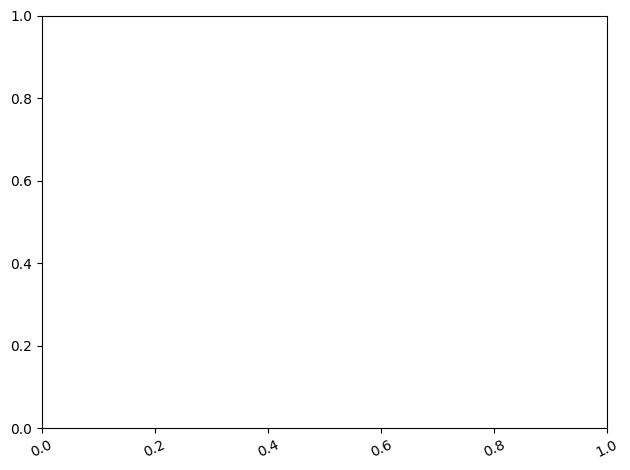

In [9]:
# data.iloc[:,:-1].boxplot(figsize=(70, 10))
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

[0.28922698 0.10345665]
0.3926836302019643


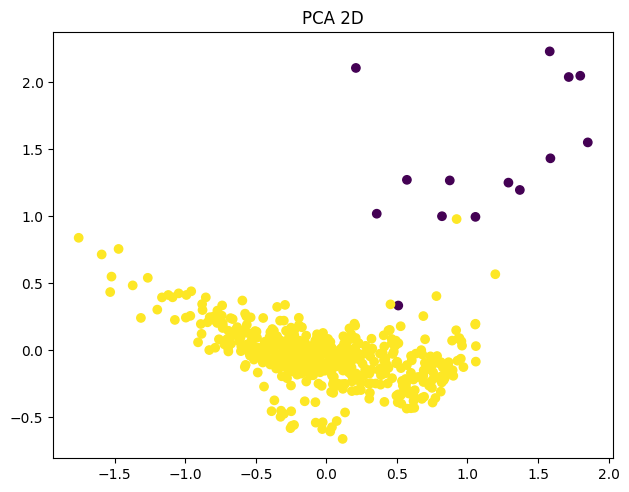

In [10]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
plt.scatter(X2D[:, 0], X2D[:, 1], c=data['class'])
plt.tight_layout()
plt.title('PCA 2D')
plt.show()

[0.28922698 0.10345665 0.06854124]
0.46122487150365865


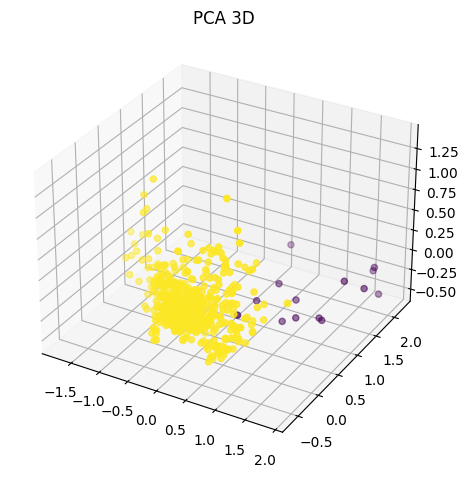

In [11]:
# %matplotlib widget
pca = PCA(n_components=3)
X2D = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X2D[:, 0], X2D[:, 1], X2D[:, 2], c=data['class'])
plt.title('PCA 3D')
plt.tight_layout()
plt.show()

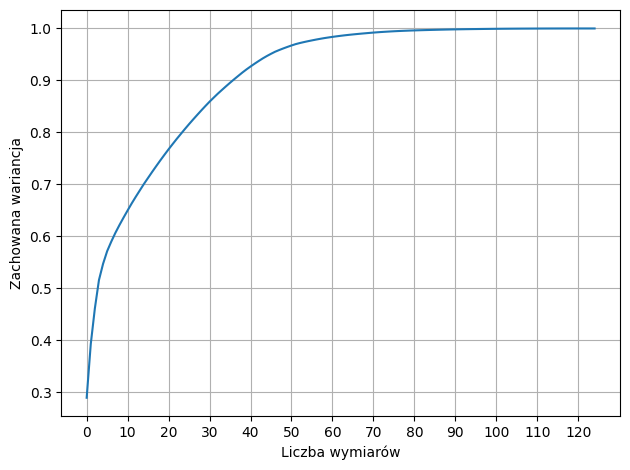

In [12]:
pca = PCA(n_components=len(data.columns)-1)
_ = pca.fit_transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba wymiarów')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), 10.0))
plt.ylabel('Zachowana wariancja')
plt.grid()
plt.tight_layout()
plt.show()

In [26]:
def get_metrics_cv(classifier, X, y):
    a = []
    for scoring in [accuracy_score, geometric_mean_score, roc_auc_score]:
        scores = cross_val_score(classifier, X, y, cv=10, scoring=make_scorer(scoring))
        a.append((scores.mean(), scores.std()))
    return a

In [46]:
print(data.shape)
X=data.iloc[:,0:-1].to_numpy()
y=data.iloc[:,-1].to_numpy()

metrics = {

}

metrics['KNeighborsClassifier'] = get_metrics_cv(make_pipeline(SMOTE(), KNeighborsClassifier()).fit(X, y), X, y)
metrics['DecisionTreeClassifier'] = get_metrics_cv(make_pipeline(SMOTE(), DecisionTreeClassifier()).fit(X, y), X, y)
metrics['RandomForestClassifier'] = get_metrics_cv(make_pipeline(SMOTE(), RandomForestClassifier()).fit(X, y), X, y)
metrics['SVC'] = get_metrics_cv(make_pipeline(SMOTE(), SVC()).fit(X, y), X, y)
metrics['MLPClassifier'] = get_metrics_cv(make_pipeline(SMOTE(), MLPClassifier()).fit(X, y), X, y)
metrics['GaussianNB'] = get_metrics_cv(make_pipeline(SMOTE(), GaussianNB()).fit(X, y), X, y)
metrics['QuadraticDiscriminantAnalysis'] = get_metrics_cv(make_pipeline(SMOTE(), QuadraticDiscriminantAnalysis()).fit(X, y), X, y)
metrics['ZeroR'] = get_metrics_cv(make_pipeline(DummyClassifier()).fit(X, y), X, y)


(500, 126)


KeyboardInterrupt: 

In [40]:
for clf, values in metrics.items():
    print(f'{clf}: {values}')

KNeighborsClassifier: [(0.99, 0.010000000000000009), (0.8958328840370265, 0.2986513478144249), (0.9458545918367347, 0.1486984841427892)]
DecisionTreeClassifier: [(0.986, 0.015620499351813323), (0.7979271825863946, 0.3989837861741683), (0.8729166666666666, 0.20030358902869855)]
RandomForestClassifier: [(0.992, 0.00979795897113272), (0.8696635288439708, 0.3026582449980816), (0.8989583333333334, 0.16523145067349215)]
SVC: [(0.992, 0.009797958971132722), (0.8686378607050494, 0.30223189323744637), (0.9229379251700681, 0.15916249446885092)]
MLPClassifier: [(0.986, 0.012806248474865708), (0.7103659198639993, 0.3772237756326831), (0.8229379251700681, 0.1947847992346783)]
GaussianNB: [(0.9399999999999998, 0.03464101615137753), (0.8437400739782929, 0.2928916364329245), (0.896279761904762, 0.15564870099382924)]
QuadraticDiscriminantAnalysis: [(0.9719999999999999, 0.009797958971132722), (0.0, 0.0), (0.5, 0.0)]
ZeroR: [(0.9719999999999999, 0.009797958971132722), (0.0, 0.0), (0.5, 0.0)]


<Figure size 640x480 with 0 Axes>

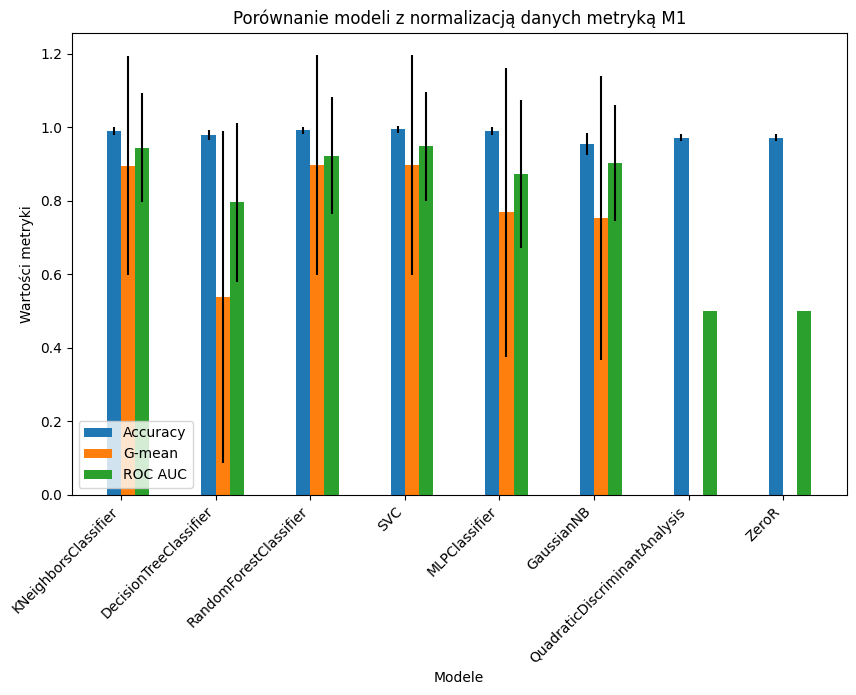

In [45]:
models = list(metrics.keys())

plt.tight_layout()
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = range(len(models))

bar1 = ax.bar(index, [val[0][0] for val in metrics.values()], bar_width, yerr=[val[0][1] for val in metrics.values()], label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], [val[1][0] for val in metrics.values()], bar_width, yerr=[val[1][1] for val in metrics.values()], label='G-mean')
bar3 = ax.bar([i + 2*bar_width for i in index], [val[2][0] for val in metrics.values()], bar_width, yerr=[val[2][1] for val in metrics.values()], label='ROC AUC')

ax.set_xlabel('Modele')
ax.set_ylabel('Wartości metryki')
ax.set_title('Porównanie modeli z normalizacją danych metryką M1')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='lower left')

plt.show()
